In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston


In [9]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
plt.style.use('fivethirtyeight')

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [10]:
boston = load_boston()

In [11]:
data = boston.data

In [12]:
target = boston.target

In [13]:
feature_names = boston.feature_names

In [14]:
X = pd.DataFrame(data, columns = feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [16]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [17]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
price    506 non-null float64
dtypes: float64(1)
memory usage: 4.1 KB


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)

In [22]:
from sklearn.manifold import TSNE

In [23]:
tsne = TSNE(n_components = 2, learning_rate=250, random_state=42)

In [24]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [25]:
X_train_tsne

array([[ 2.97641506e+01,  2.09873695e+01],
       [-4.24747753e+00, -1.05048418e+01],
       [-1.88142662e+01, -1.11759501e+01],
       [ 2.22976513e+01,  3.03626900e+01],
       [ 1.73852992e+00, -9.13341045e+00],
       [-9.11401844e+00, -1.16824980e+01],
       [-7.18314266e+00, -1.13112659e+01],
       [-2.71195641e+01, -1.09560461e+01],
       [ 2.35586834e+01,  2.98370991e+01],
       [ 2.21154327e+01,  2.70719757e+01],
       [-7.48745012e+00, -1.18326397e+01],
       [-6.44317818e+00, -3.84728122e+00],
       [-7.40933466e+00,  4.96774942e-01],
       [ 2.14254093e+01,  2.80373745e+01],
       [-9.20851231e+00,  8.65101755e-01],
       [ 6.97665644e+00, -8.96529102e+00],
       [ 4.76356819e-02, -6.78444767e+00],
       [-1.99967651e+01, -1.17451982e+01],
       [-1.69370003e+01, -4.91067171e+00],
       [-1.82409534e+01, -8.73804474e+00],
       [ 2.58343925e+01,  2.55089264e+01],
       [-1.82226837e-01, -3.70452142e+00],
       [-1.09841108e+01, -1.15292959e+01],
       [-6.

In [26]:
X_train_tsne.shape

(404, 2)

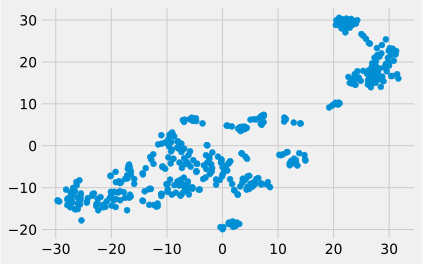

In [27]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [28]:
from sklearn.cluster import KMeans

In [29]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [30]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [31]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

Text(20, 5, 'Кластер 2')

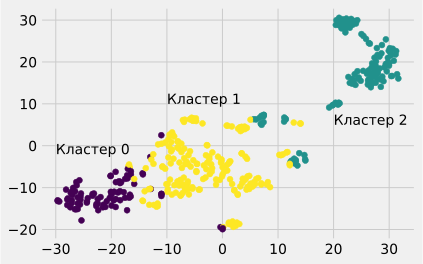

In [53]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-30, -2, 'Кластер 0')
plt.text(-10, 10, 'Кластер 1')
plt.text(20, 5, 'Кластер 2')

### Кластер 0: mean.price mean.CRIM 

In [42]:
y_train.loc[labels_train==0, 'price'].mean()

27.788372093023252

In [43]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

### Кластер 1: mean.price mean.CRIM 

In [44]:
y_train.loc[labels_train==1, 'price'].mean()

16.165354330708666

In [45]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

### Кластер 2: mean.price mean.CRIM 

In [46]:
y_train.loc[labels_train==2, 'price'].mean()

24.958115183246072

In [40]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367

### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [99]:
labels_test = kmeans.predict(X_test_scaled)

In [100]:
pd.value_counts(labels_test)

2    51
1    35
0    16
dtype: int64

### testdata Кластер 0: mean.price mean.CRIM 

In [101]:
y_test.loc[labels_test==0, 'price'].mean()

31.35

In [103]:
X_test_scaled.loc[labels_test==0, 'CRIM'].mean()

0.007001300525347133

### testdata Кластер 1: mean.price mean.CRIM 

In [104]:
y_test.loc[labels_test==1, 'price'].mean()

16.437142857142856

In [83]:
X_test_scaled.loc[labels_test==1, 'CRIM'].mean()

1.2180670445620154

### testdata Кластер 2: mean.price mean.CRIM 

In [105]:
y_test.loc[labels_test==2, 'price'].mean()

21.860784313725492

In [106]:
X_test_scaled.loc[labels_test==2, 'CRIM'].mean()

0.030017689445056683